In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import random


# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [8]:
qc = QuantumCircuit(5,4)

#a = random.randint(0,3)
#b = random.randint(0,3)
a = 0
b = 3
while a == b:
    b = random.randint(0,3)

for i in range(5):
    qc.h(i)
qc.z(4)

qc.barrier()

qc.cx(a,4)
qc.cx(b,4)

qc.barrier()
for i in range(4):
    qc.h(i)
qc.barrier()
for i in range(4):
    qc.measure(i,i)

qc.draw().savefig('circuit-5 qubit')

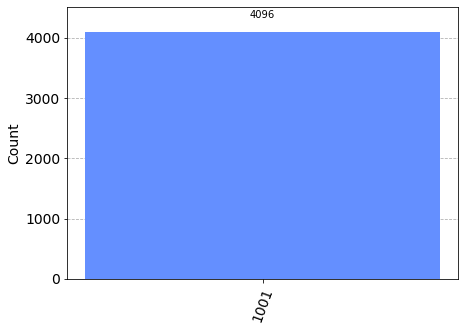

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc, backend), shots=4096).result()
counts  = result.get_counts(qc)
plot_histogram(counts)

In [18]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(qc, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


In [17]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-11-07 02:06:21,161: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_manila


In [3]:
qc = QuantumCircuit(9,8)

a = random.randint(0,7)
b = random.randint(0,7)

while a == b:
    b = random.randint(0,7)

for i in range(9):
    qc.h(i)
qc.z(8)

qc.barrier()

qc.cx(a,8)
qc.cx(b,8)

qc.barrier()
for i in range(8):
    qc.h(i)
qc.barrier()
for i in range(8):
    qc.measure(i,i)

qc.draw().savefig('circuit-8.png')

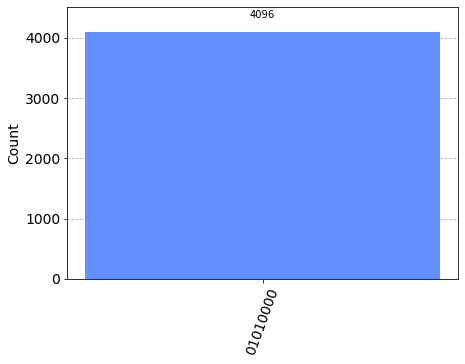

In [4]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc, backend), shots=4096).result()
counts  = result.get_counts(qc)
plot_histogram(counts)